    Это проект Андрея.
    О да.

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

    Подсчитаем общие величины:

In [1]:
#Считывание данных

data = list(map(float, input().split()))

31.2 30.93 30.71 30.6 30.5 30.69 30.68 31.09 31.4 31.96 32.75 33.84


In [2]:
#Проверка верности ввода

print(*data)

31.2 30.93 30.71 30.6 30.5 30.69 30.68 31.09 31.4 31.96 32.75 33.84


In [9]:
#Вывод таблицей
height = 27
weight = 10
for i in range(height):
    print(*data [i*weight : (i+1)*weight], sep = '\t')

68.23	67.95	67.63	67.75	68.21	68.31	68.53	68.92	67.82	67.97
67.49	67.57	68.59	67.58	69.03	67.72	68.21	68.52	67.38	68.02
67.85	69.08	67.84	69.12	68.33	68.85	68.82	68.59	67.55	67.97
66.58	67.27	66.92	67.01	66.86	66.54	67.47	66.92	67.43	67.5
67.03	67.02	66.94	67.42	66.78	67.89	67.28	67.7	67.59	67.01
67.03	66.81	67.22	67.64	67.78	67.22	66.99	67.27	66.88	66.83
68.38	68.13	67.85	68.13	68.13	69.9	68.1	68.66	68.03	67.98
68.19	68.06	67.98	68.0	68.31	68.69	67.3	68.16	67.83	67.44
68.09	67.98	67.14	66.98	68.57	67.65	68.07	66.27	68.81	68.21
67.36	67.18	67.76	68.51	68.25	67.85	67.5	68.23	67.7	68.18
67.58	66.68	68.27	67.51	67.11	67.87	68.18	68.41	69.08	69.31
67.91	67.95	68.61	68.09	68.16	68.49	67.91	68.95	67.91	68.63
67.5	66.74	67.54	66.67	67.39	67.26	67.36	67.74	66.85	67.25
66.93	66.88	67.43	66.99	67.61	67.49	67.03	67.17	67.05	67.51
69.28	67.68	66.93	67.27	67.07	67.82	67.1	66.69	66.89	68.95
67.45	67.29	67.2	67.41	67.12	66.9	67.2	67.58	67.28	67.67
67.76	67.51	67.23	67.75	67.66	67.7	67.94	68.3	68.45	6

In [2]:
#Подсчёт минимального, среднего, максимального
data_min = min(data)
data_mid = sum(data) / len(data)
data_max = max(data)
print(data_min, data_mid, data_max, sep = '\n')

66.27
67.77714814814813
70.06


In [6]:
#Среднеквадратичная погрешность
sigma = math.sqrt(sum((data[i] - data_mid) ** 2 for i in range (len (data))) / len (data))
print(sigma)

0.6468210127203435


In [10]:
num = 0
for i in data:
    if i > data_mid - sigma * 3 and i < data_mid + sigma * 3:
        num += 1
print(num / len (data) * 100)

99.25925925925925


    Построим гистограммы:

In [65]:
m = 20 #количество столбцов
delta_data = (data_max - data_min) / m #шаг
print(delta_data)

0.1895000000000003


In [66]:
#разбиение для гистограммы
eps = math.pow(10, -6)
data_w = [0]*m
data_points = [data_min + delta_data * i for i in range (m)]
for i in range (len (data)):
    x = math.trunc((data[i] - data_min - eps) / delta_data)
    data_w[x] += 1
print(*data_w)
for i in range (m):
    data_w[i] /= len (data) * delta_data
#print(*data_w)
for i in data_w:
    print(round (i*1000), end = " ")

1 3 8 23 19 31 28 31 30 21 24 14 18 7 6 3 1 0 0 2
20 59 156 450 371 606 547 606 586 410 469 274 352 137 117 59 20 0 0 39 

In [34]:
# Ввод функции
def func (num): 
    global sigma
    global data_mid
    return 1 / math.sqrt (2*math.pi) / sigma * math.pow (math.e, -(num - data_mid) ** 2 / 2 / sigma ** 2)
data_sorted = sorted(data)
data_func = [func (data_sorted[i]) for i in range (len (data_sorted))]

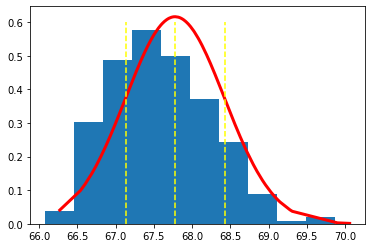

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Гистограмма
ax.bar (data_points, data_w, width = delta_data);
# Нормальное распределение
ax.plot (data_sorted, data_func, linewidth = 3, color = "red");
# Вертикальные линии
ax.plot ([data_mid] * 2, [0] + [0.6], color = "yellow", linestyle = '--');
ax.plot ([data_mid - sigma] * 2, [0] + [0.6], color = "yellow", linestyle = '--');
ax.plot ([data_mid + sigma] * 2, [0] + [0.6], color = "yellow", linestyle = '--');